In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [17]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
final=scaler.transform(df)

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [23]:
pca.fit(final)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca_final=pca.transform(final)

In [27]:
final.shape

(569, 30)

In [29]:
pca_final.shape

(569, 2)

Text(0,0.5,'Second principal component')

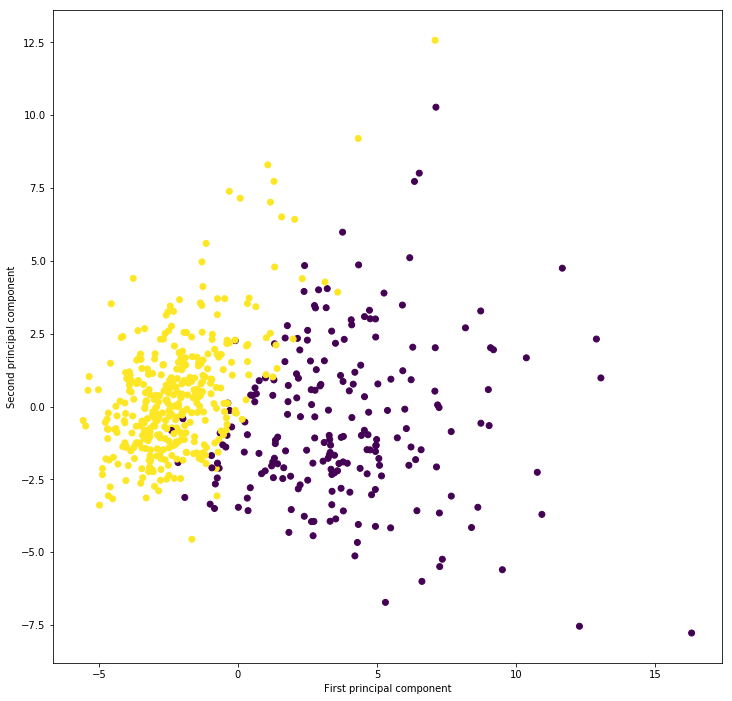

In [31]:
plt.figure(figsize=(12,12))
plt.scatter(pca_final[:,0],pca_final[:,1],c=cancer['target'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [34]:
x=pca_final

In [35]:
y=cancer['target']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn import linear_model
reg=linear_model.LogisticRegression()

In [38]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred=reg.predict(x_test)

In [40]:
reg.score(x_test,y_test)

0.956140350877193

In [42]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [43]:
score

0.956140350877193

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[36,  3],
       [ 2, 73]], dtype=int64)